In [1]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path = 'archive.zip'  # Thay đổi tên file nếu cần

# Thư mục đích để giải nén
extract_dir = 'gtsrb-data'  # Thư mục sẽ được tạo mới

# Tạo thư mục nếu chưa tồn tại
os.makedirs(extract_dir, exist_ok=True)

# Giải nén file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    
print(f"Đã giải nén thành công vào thư mục: {extract_dir}")

Đã giải nén thành công vào thư mục: gtsrb-data


In [4]:
!pip install numpy pandas matplotlib opencv-python tensorflow scikit-learn pillow

  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp311-cp311-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.meta

In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [17]:
# Hoặc nếu muốn dùng thư mục gtsrb-data:
data_dir = './gtsrb-data'
train_path = os.path.join(data_dir, 'Train')
test_path = os.path.join(data_dir, 'Test')

# Sửa tên biến kích thước ảnh (có lỗi chính tả)
IMG_HEIGHT = 30  # Sửa từ IMG_METGHT
IMG_WIDTH = 30   # Sửa từ IMG_MIDTH
channels = 3

In [18]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [19]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

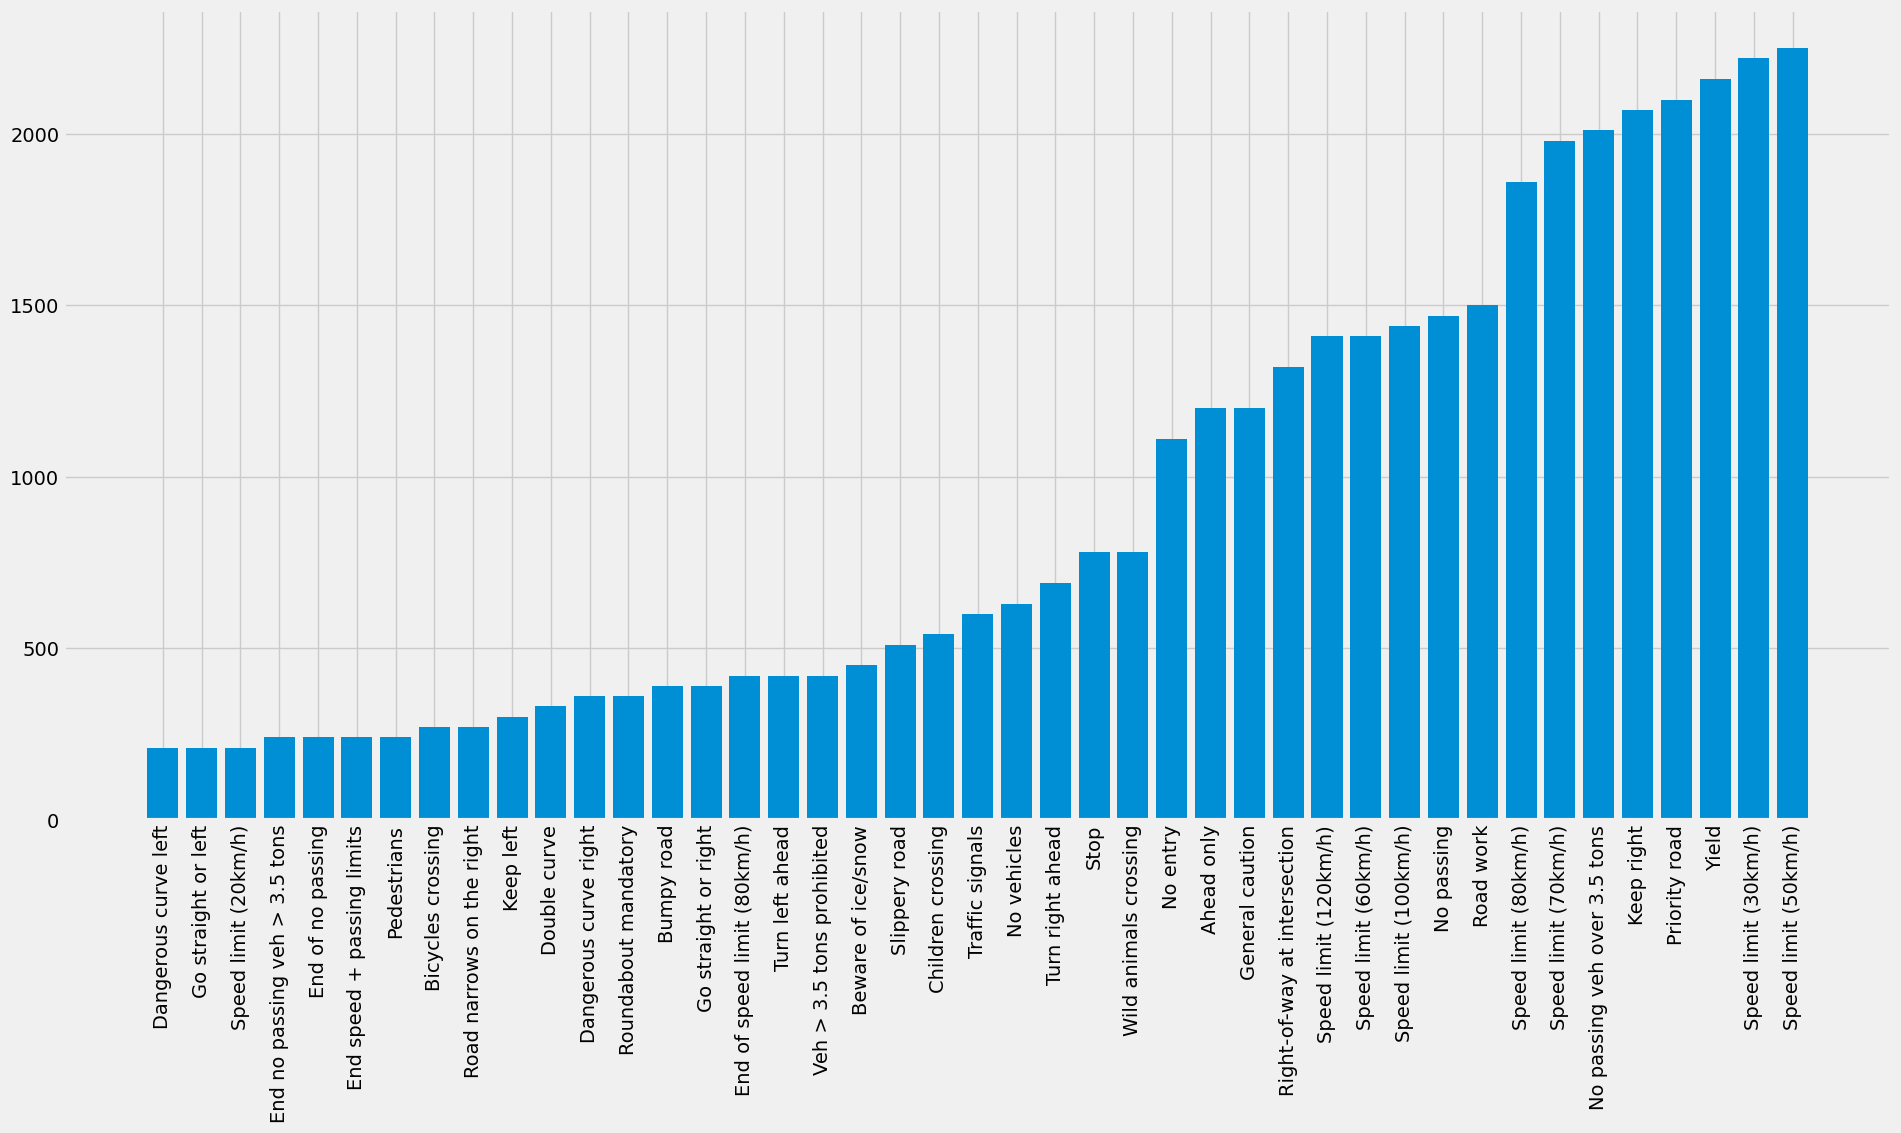

In [20]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

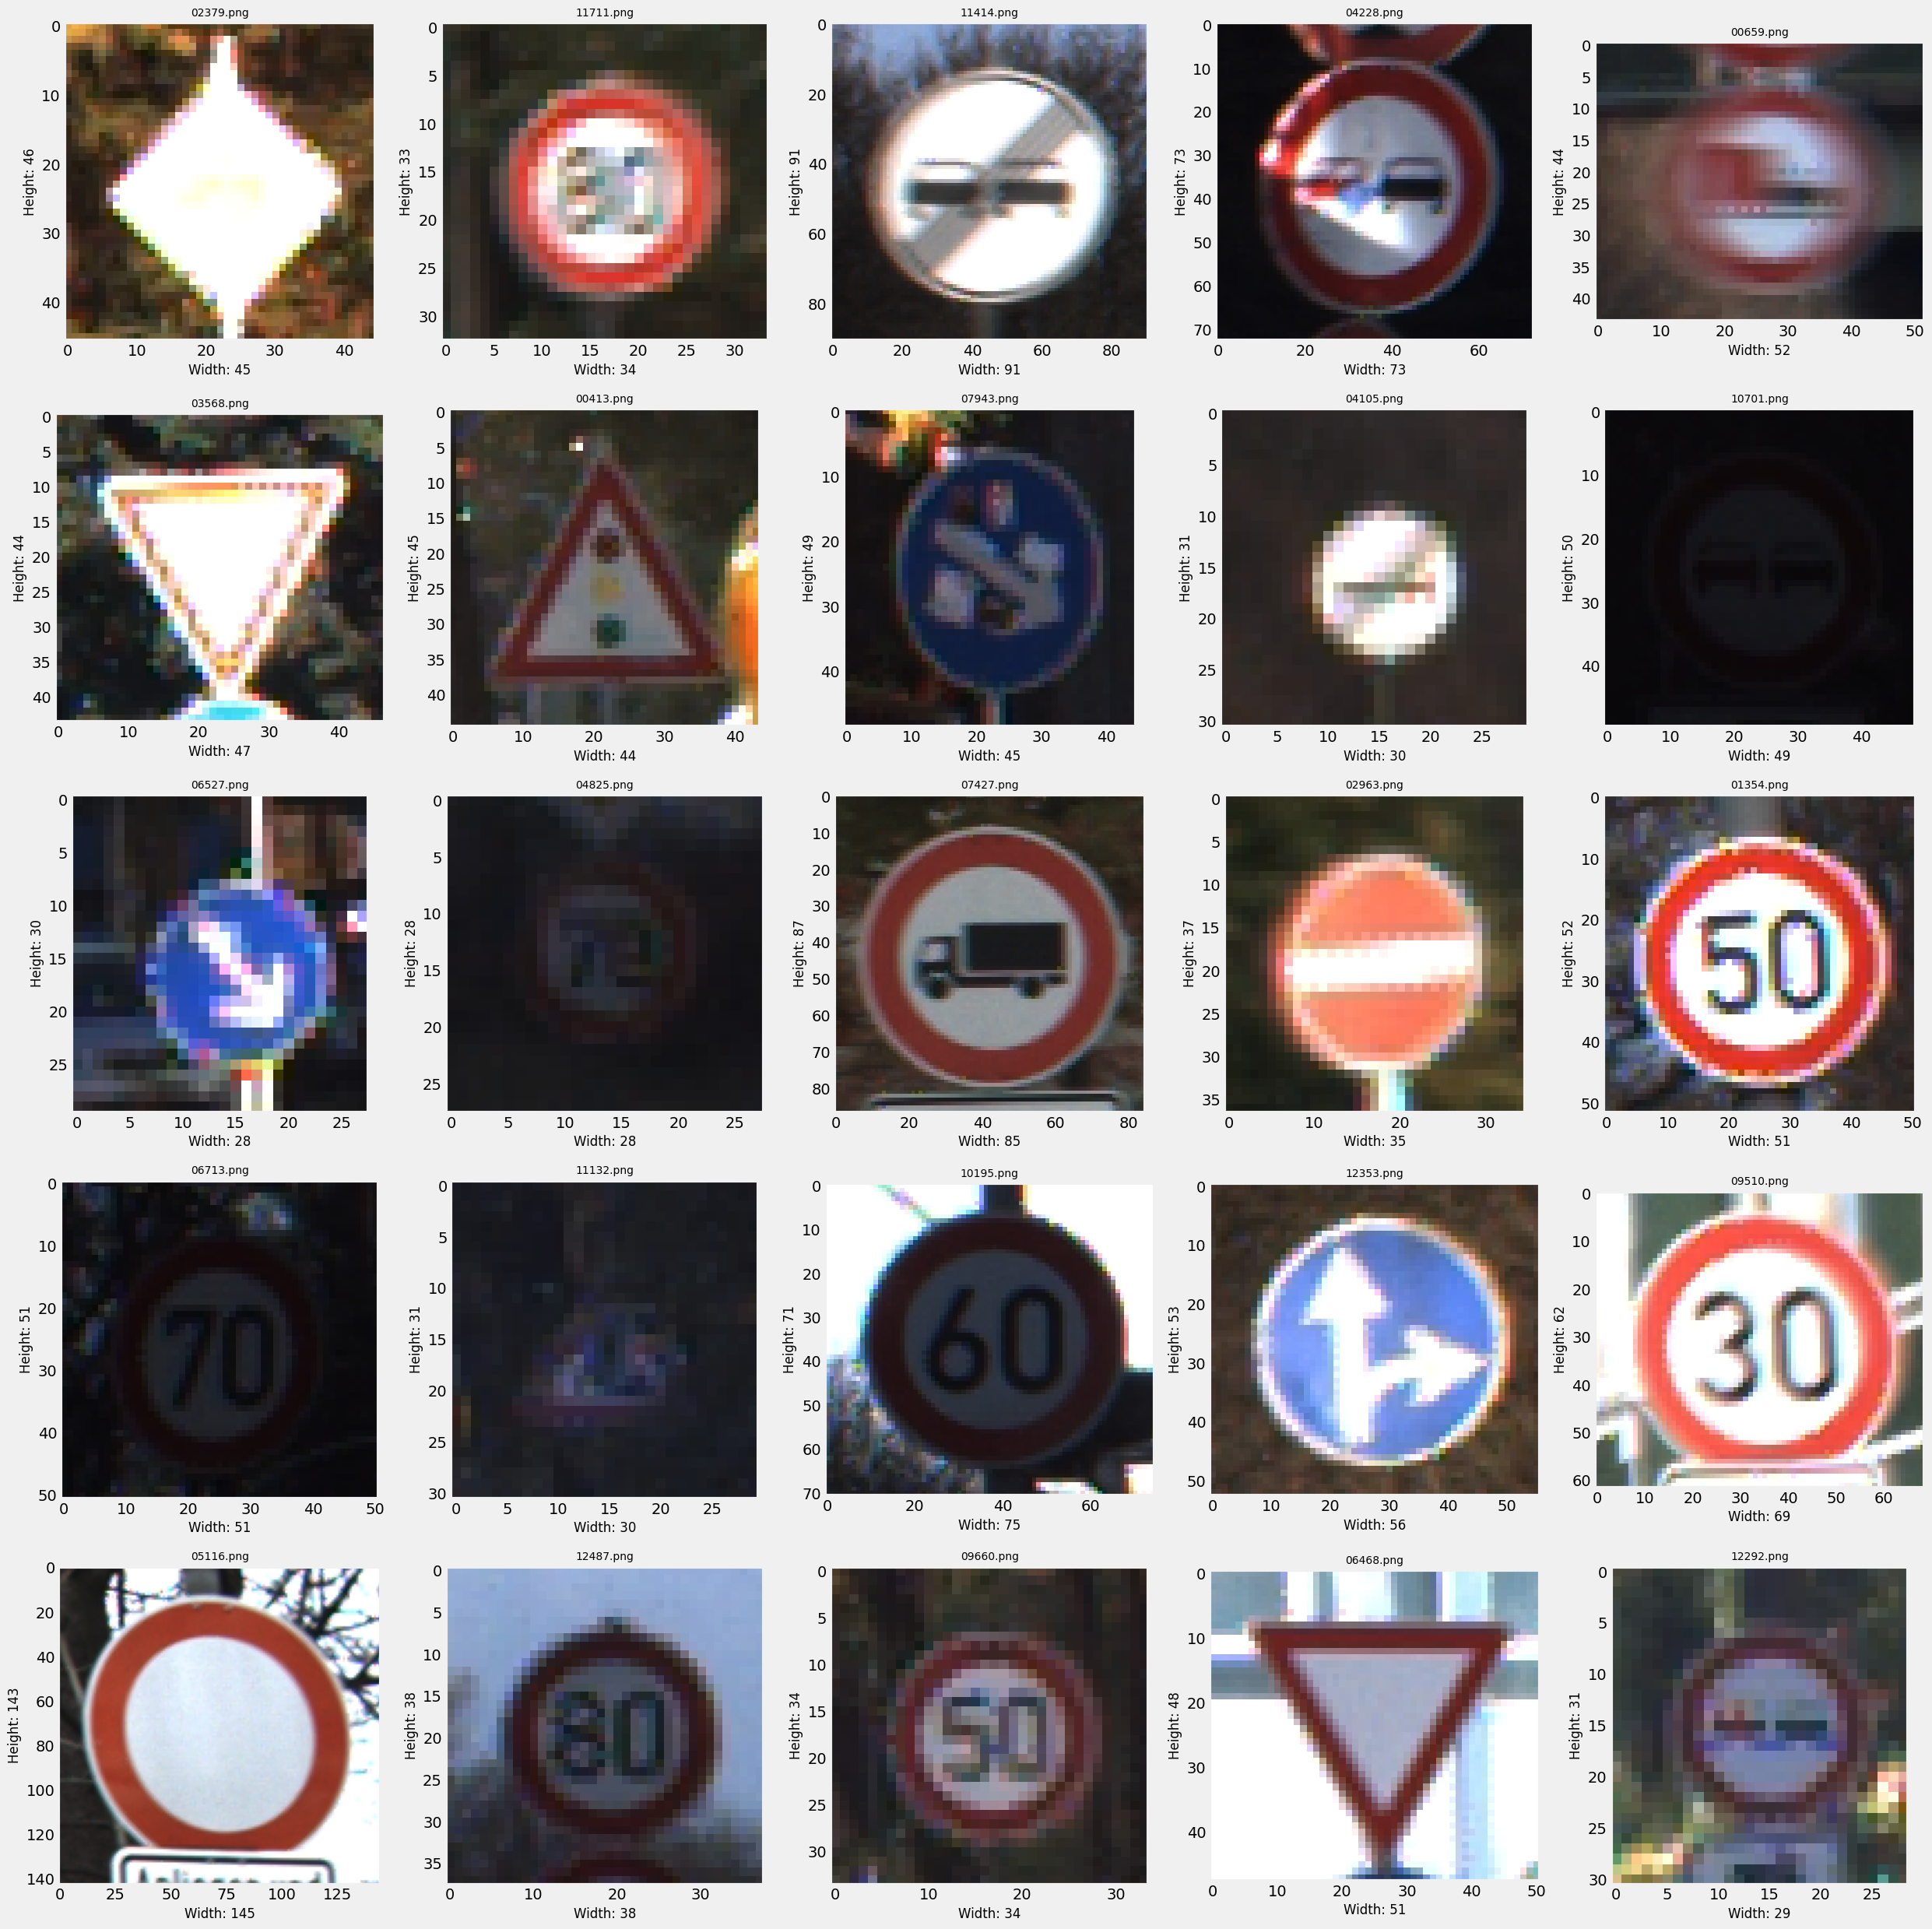

In [23]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

# Read test CSV
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = os.path.join(data_dir, random.choice(imgs))
    
    # Check if image exists
    if not os.path.exists(random_img_path):
        print(f"Image not found: {random_img_path}")
        continue
    
    try:
        rand_img = imread(random_img_path)
        plt.imshow(rand_img)
        plt.grid(False)  # Correct way to turn off grid
        plt.xlabel(f"Width: {rand_img.shape[1]}", fontsize=12)
        plt.ylabel(f"Height: {rand_img.shape[0]}", fontsize=12)
        plt.title(os.path.basename(random_img_path), fontsize=10)
    except Exception as e:
        print(f"Error loading image {random_img_path}: {str(e)}")
        continue

plt.tight_layout()
plt.show()

In [24]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [25]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [26]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [27]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, channels)),  # Layer Input đầu tiên
    
    Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),  # Sửa từ nate=0.5 → rate=0.5

    Dense(43, activation='softmax')
])

model.summary()  # In ra kiến trúc mô hình

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171,275 (4.47 MB)

 Trainable params: 1,169,931 (4.46 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [32]:
from tensorflow.keras.optimizers import Adam

# Hyperparameters
lr = 0.001  # Sửa từ ip -> lr
epochs = 30

# Tạo optimizer với learning rate và decay
opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))  # Sửa dấu - thành =

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,  # Sửa từ optimize -> optimizer
    metrics=['accuracy']  # Sửa cú pháp metrics
)

In [33]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30


c:\Users\phat6\OneDrive\Desktop\test\gtsrb\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.5258 - loss: 1.9239 - val_accuracy: 0.9698 - val_loss: 0.0983
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9306 - loss: 0.2277 - val_accuracy: 0.9734 - val_loss: 0.0842
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9612 - loss: 0.1322 - val_accuracy: 0.9833 - val_loss: 0.0506
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9680 - loss: 0.1046 - val_accuracy: 0.9891 - val_loss: 0.0347
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9723 - loss: 0.0876 - val_accuracy: 0.9846 - val_loss: 0.0498
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9728 - loss: 0.0790 - val_accuracy: 0.9828 - val_loss: 0.0538
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9765 - loss: 0.0777 - val_accuracy: 0.9970 - val_loss: 0.0114
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9821 - loss: 0.0583 - val_accurac

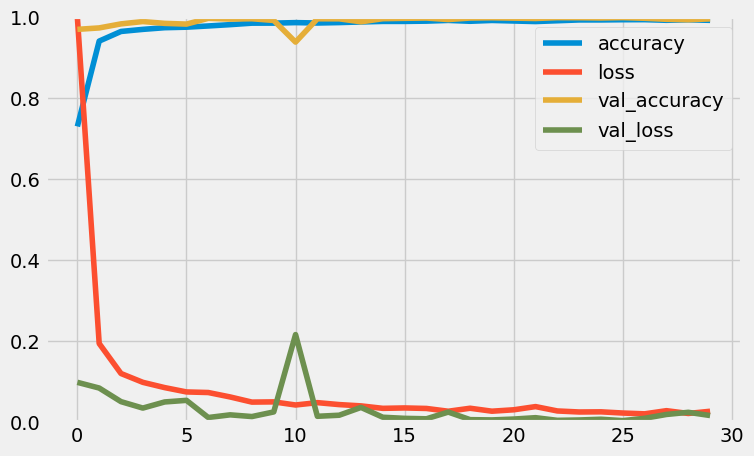

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

labels = test["ClassId"].values
imgs = test["Path"].values

data = []
for img in imgs:
    try:
        image = cv2.imread(os.path.join(data_dir, img))
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))  # Sửa IMG_MIDTH -> IMG_WIDTH
        data.append(np.array(resize_image))
    except Exception as e:
        print(f"Error in {img}: {str(e)}")

X_test = np.array(data)
X_test = X_test/255

# Sửa thay cho predict_classes
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)  # Lấy class có xác suất cao nhất

# Độ chính xác trên tập test
print('Test Data accuracy:', accuracy_score(labels, pred)*100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Data accuracy: 96.82501979414093


In [37]:
# Lưu dữ liệu vào file .npz
np.savez_compressed(
    'gtsrb_train.npz',
    x_train=X_train,  # Ảnh
    y_train=y_train   # Nhãn
)

print(f"Đã lưu {len(X_train)} ảnh training vào file gtsrb_train.npz")
print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước y_train: {y_train.shape}")

Đã lưu 27446 ảnh training vào file gtsrb_train.npz
Kích thước X_train: (27446, 30, 30, 3)
Kích thước y_train: (27446, 43)
